In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# homework 2
due March 4th, 2019

write a function that takes a probability distribution sample (an unsorted numpy array of numbers that were sampled from a probability distribution) and calculate the high probability density intervals (5%-100% percentile of the probability density). Report all continuous regions as separate intervals. Please test it with the bimodal distribution below and see whether you get two HPD regions instead of just one.
The output should be in the form of a list of intervals (list of two values that brace the interval). For example: [[-4.0,0.0],[2.0,6.0]].
The first step is to estimate the probability density which you can get by binning the data into a histogram (here the challenge is to pick an appropriate binning density).  Then you have to sort the data according to probability density and then picking the HPD data.  After that you need to estimate the continuous intervals of data.

Good luck

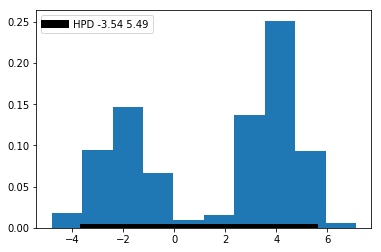

In [11]:
gauss_a = stats.norm.rvs(loc=4, scale=0.9, size=3000)
gauss_b = stats.norm.rvs(loc=-2, scale=1, size=2000)

# mix norm is the input of your function
mix_norm = np.concatenate((gauss_a, gauss_b))

HPD = np.percentile(mix_norm,[2.5,97.5])
plt.hist(mix_norm, density=True)
plt.plot(HPD,[0,0],label='HPD {:.2f} {:.2f}'.format(*HPD),
        linewidth=8, color='k')
plt.legend(fontsize=10)

In [6]:
len(mix_norm)

5000

In [7]:
#first sort the sample
mix_norm.sort()

In [8]:
#hint
# create histogram by binning
hist, edges = np.histogram(mix_norm, bins=40)

In [9]:
# calculate cumulative sum of hist
# the goal is to create a list of lists that contain the elements in the bins
cum = np.cumsum(hist)
cum = np.insert(cum,0,0)
print(hist)
print(cum)

[  1   0   3   8  18  27  70 100 143 190 236 251 239 208 182 137  86  51
  27  14   6   3   9  19  35  85 131 204 332 382 415 401 338 256 192 107
  55  24  10   5]
[   0    1    1    4   12   30   57  127  227  370  560  796 1047 1286
 1494 1676 1813 1899 1950 1977 1991 1997 2000 2009 2028 2063 2148 2279
 2483 2815 3197 3612 4013 4351 4607 4799 4906 4961 4985 4995 5000]


In [10]:
# create element list
element_list = [mix_norm[c:c+h] for h,c in zip(hist,cum)]
element_list

[array([-5.73967873]),
 array([], dtype=float64),
 array([-5.00592537, -4.91696826, -4.80222727]),
 array([-4.76572444, -4.75526253, -4.67299349, -4.6398534 , -4.56080342,
        -4.5536524 , -4.50555006, -4.50523158]),
 array([-4.39633896, -4.39483204, -4.38942652, -4.38209572, -4.33834182,
        -4.32225384, -4.3192303 , -4.30779805, -4.28030119, -4.26834366,
        -4.25434748, -4.24243263, -4.23970949, -4.23461191, -4.21871028,
        -4.20491611, -4.16993143, -4.16062566]),
 array([-4.1534864 , -4.13848875, -4.07593489, -4.05043936, -4.04373162,
        -4.04008627, -4.03835723, -4.0371333 , -4.01446486, -4.01026485,
        -4.00775553, -4.00646919, -4.00473341, -3.99191453, -3.98479864,
        -3.96487775, -3.95348626, -3.94193927, -3.93433103, -3.89765517,
        -3.8862955 , -3.86429906, -3.8607519 , -3.85134274, -3.85065401,
        -3.84854102, -3.84355706]),
 array([-3.82512806, -3.81857108, -3.81615018, -3.81474761, -3.7998427 ,
        -3.79753268, -3.78284215, -3.

In [ ]:
# now you need to eliminate the bins that are in the bottom 5 percentile